In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
file_path = "/content/drive/MyDrive/coffee-prices-historical-data.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660


In [ ]:
df.columns =["fecha", "valor"]


In [ ]:
df["fecha"]= pd.to_datetime(df["fecha"], errors= "coerce")

In [ ]:
print(df.info)


<bound method DataFrame.info of            fecha   valor
0     1973-08-20  0.6735
1     1973-08-21  0.6710
2     1973-08-22  0.6580
3     1973-08-23  0.6675
4     1973-08-24  0.6660
...          ...     ...
12558        NaT     NaN
12559        NaT     NaN
12560        NaT     NaN
12561        NaT     NaN
12562        NaT     NaN

[12563 rows x 2 columns]>


In [ ]:
print(df.describe())

                               fecha         valor
count                          12542  12542.000000
mean   1998-09-16 08:38:02.506777216      1.289773
min              1973-08-20 00:00:00      0.425000
25%              1986-03-13 06:00:00      0.960500
50%              1998-09-15 12:00:00      1.248500
75%              2011-04-04 18:00:00      1.510000
max              2023-08-04 00:00:00      3.356300
std                              NaN      0.490239


In [ ]:
print(df.isnull().sum())

fecha    21
valor    21
dtype: int64


In [ ]:
df = df.dropna(subset=['valor'])

In [ ]:
Q1 = df["valor"].quantile(0.25)
Q3 = df["valor"].quantile(0.75)
IQR = Q3 -Q1

In [ ]:
limite_inferioe= Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 *IQR

In [ ]:
valores_atipicos = df[(df["valor"] < limite_inferioe) | (df["valor"] > limite_superior)]
print(f"Valores atípicos encontrados: {valores_atipicos.shape[0]}")

Valores atípicos encontrados: 461


In [ ]:
valores_atipicos

,fecha,valor,mes
856,1977-02-07,2.3590,2
858,1977-02-09,2.3525,2
859,1977-02-10,2.3570,2
860,1977-02-11,2.3728,2
861,1977-02-14,2.4100,2
...,...,...,...
12301,2022-08-29,2.4100,8
12302,2022-08-30,2.3900,8
12303,2022-08-31,2.4000,8
12304,2022-09-01,2.3700,9


In [ ]:
def obtener_estacio(mes):
  if mes in [12,1,2]:
    return "invierno"
  elif mes in [3,4,5]:
    return "primavera"
  elif mes in [6,7,8]:
    return "verano"
  elif mes in [9,10,11]:
    return "otoño"

<ipython-input-40-238395e39372>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores_atipicos["mes"] = valores_atipicos["fecha"].dt.month
<ipython-input-40-238395e39372>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valores_atipicos["estacion"] = valores_atipicos["mes"].apply(obtener_estacio)


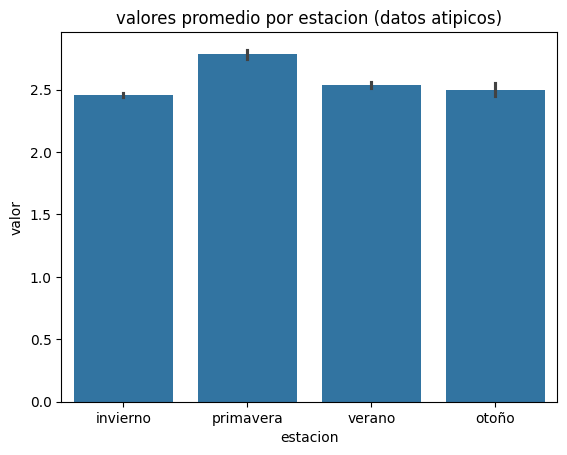

In [ ]:
import matplotlib.pyplot as plt
import seaborn as snb

valores_atipicos["mes"] = valores_atipicos["fecha"].dt.month
valores_atipicos["estacion"] = valores_atipicos["mes"].apply(obtener_estacio)

snb.barplot(x="estacion", y= "valor" , data =valores_atipicos )
plt.title("valores promedio por estacion (datos atipicos)")
plt.show()


In [ ]:
datoslimpios = df[(df["valor"]>= limite_inferioe ) & (df["valor"] <= limite_superior)]

In [ ]:
datoslimpios

,fecha,valor
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660
...,...,...
12537,2023-07-31,1.6537
12538,2023-08-01,1.6458
12539,2023-08-02,1.6618
12540,2023-08-03,1.6340


YA SE FINALIZO LA FASE DE LIMPIEZA ES DECIR YA TENGO LOS DATOS LISTOS PARA APLICAR FILTROS Y COMPRENDER DE MEJOR MANERA LOS DATOS

In [ ]:
datoslimpios.describe()

,fecha,valor
count,12081,12081.000000
mean,1998-08-12 11:47:39.796374400,1.239726
min,1973-08-20 00:00:00,0.425000
25%,1986-05-21 00:00:00,0.946000
50%,1998-07-16 00:00:00,1.234500
75%,2010-08-18 00:00:00,1.464500
max,2023-08-04 00:00:00,2.333900
std,NaN,0.423320


In [ ]:
datoslimpios["cambios_anuales"] = datoslimpios["valor"].diff()

<ipython-input-20-e7bba6db3178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoslimpios["cambios_anuales"] = datoslimpios["valor"].diff()


In [ ]:
datoslimpios

,fecha,valor,cambios_anuales
0,1973-08-20,0.6735,NaN
1,1973-08-21,0.6710,-0.0025
2,1973-08-22,0.6580,-0.0130
3,1973-08-23,0.6675,0.0095
4,1973-08-24,0.6660,-0.0015
...,...,...,...
12537,2023-07-31,1.6537,0.0698
12538,2023-08-01,1.6458,-0.0079
12539,2023-08-02,1.6618,0.0160
12540,2023-08-03,1.6340,-0.0278


In [ ]:
datoslimpios["cambios_anuales"] = datoslimpios["valor"].diff()

<ipython-input-22-e7bba6db3178>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoslimpios["cambios_anuales"] = datoslimpios["valor"].diff()


In [ ]:
datoslimpios["cambios_porcentaje"] = datoslimpios["valor"].pct_change() * 100

<ipython-input-23-d285c52d474c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoslimpios["cambios_porcentaje"] = datoslimpios["valor"].pct_change() * 100


In [ ]:
datoslimpios

,fecha,valor,cambios_anuales,cambios_porcentaje
0,1973-08-20,0.6735,NaN,NaN
1,1973-08-21,0.6710,-0.0025,-0.371195
2,1973-08-22,0.6580,-0.0130,-1.937407
3,1973-08-23,0.6675,0.0095,1.443769
4,1973-08-24,0.6660,-0.0015,-0.224719
...,...,...,...,...
12537,2023-07-31,1.6537,0.0698,4.406844
12538,2023-08-01,1.6458,-0.0079,-0.477717
12539,2023-08-02,1.6618,0.0160,0.972172
12540,2023-08-03,1.6340,-0.0278,-1.672885


ESTADISTICA DESCRIPVTIVA

In [ ]:
print("estadistica de valor")
print(datoslimpios["valor"].describe())

estadistica de valor
count    12081.000000
mean         1.239726
std          0.423320
min          0.425000
25%          0.946000
50%          1.234500
75%          1.464500
max          2.333900
Name: valor, dtype: float64


In [ ]:
print("estadsitica de cambios anuales")
print(datoslimpios["cambios_anuales"].describe())

estadsitica de cambios anuales
count    12080.000000
mean         0.000078
std          0.028894
min         -0.241500
25%         -0.012500
50%          0.000000
75%          0.013000
max          0.341700
Name: cambios_anuales, dtype: float64


In [ ]:
datoslimpios['fecha'].dtype

dtype('<M8[ns]')

In [ ]:
datoslimpios["mes"]= datoslimpios["fecha"].dt.month

<ipython-input-28-304a94689b0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoslimpios["mes"]= datoslimpios["fecha"].dt.month


In [ ]:
datoslimpios


,fecha,valor,cambios_anuales,cambios_porcentaje,mes
0,1973-08-20,0.6735,NaN,NaN,8
1,1973-08-21,0.6710,-0.0025,-0.371195,8
2,1973-08-22,0.6580,-0.0130,-1.937407,8
3,1973-08-23,0.6675,0.0095,1.443769,8
4,1973-08-24,0.6660,-0.0015,-0.224719,8
...,...,...,...,...,...
12537,2023-07-31,1.6537,0.0698,4.406844,7
12538,2023-08-01,1.6458,-0.0079,-0.477717,8
12539,2023-08-02,1.6618,0.0160,0.972172,8
12540,2023-08-03,1.6340,-0.0278,-1.672885,8


In [ ]:
def obtener_estacio(mes):
  if mes in [12,1,2]:
    return "invierno"
  elif mes in [3,4,5]:
    return "primavera"
  elif mes in [6,7,8]:
    return "verano"
  elif mes in [9,10,11]:
    return "otoño"



In [ ]:
datoslimpios["climatizacion"]= datoslimpios["mes"].apply(obtener_estacio)

<ipython-input-32-f76a8131947b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoslimpios["climatizacion"]= datoslimpios["mes"].apply(obtener_estacio)


In [ ]:
datoslimpios

,fecha,valor,cambios_anuales,cambios_porcentaje
0,1973-08-20,0.6735,NaN,NaN
1,1973-08-21,0.6710,-0.0025,-0.371195
2,1973-08-22,0.6580,-0.0130,-1.937407
3,1973-08-23,0.6675,0.0095,1.443769
4,1973-08-24,0.6660,-0.0015,-0.224719
...,...,...,...,...
12537,2023-07-31,1.6537,0.0698,4.406844
12538,2023-08-01,1.6458,-0.0079,-0.477717
12539,2023-08-02,1.6618,0.0160,0.972172
12540,2023-08-03,1.6340,-0.0278,-1.672885


In [ ]:
promedio_por_estacion = datoslimpios.groupby("climatizacion")["valor"].mean()

promedio_por_estacion

,valor
climatizacion,
invierno,1.240993
otoño,1.250697
primavera,1.238106
verano,1.229269


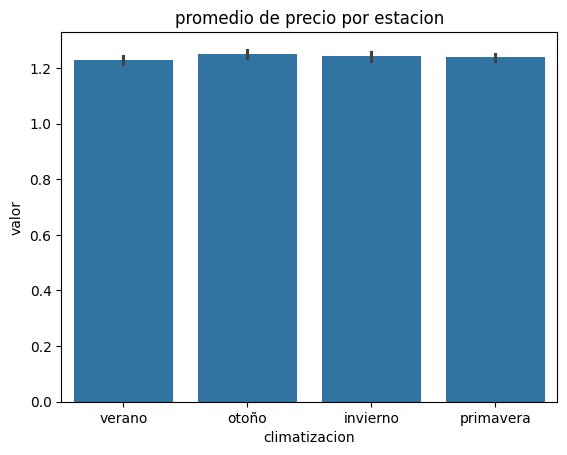

In [ ]:
import matplotlib.pyplot as plt
import seaborn as snb


snb.barplot(x="climatizacion" , y = "valor" , data = datoslimpios)
plt.title("promedio de precio por estacion")
plt.show()

In [ ]:
datoslimpios["decada"] = datoslimpios["fecha"].dt.year // 10 * 10
precio_por_decada = datoslimpios.groupby("decada")["valor"].mean().reset_index

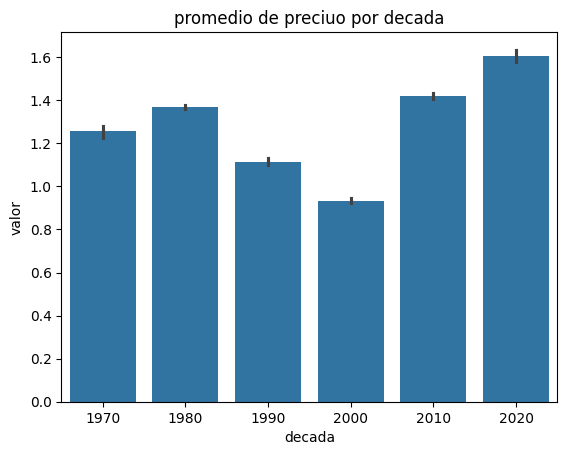

In [ ]:
import matplotlib.pyplot as plt
import seaborn as snb

snb.barplot( x= "decada" , y = "valor", data = datoslimpios)
plt.title("promedio de preciuo por decada")
plt.show()

In [ ]:
datoslimpios


,fecha,valor,cambios_anuales,cambios_porcentaje,mes,climatizacion,decada
0,1973-08-20,0.6735,NaN,NaN,8,verano,1970
1,1973-08-21,0.6710,-0.0025,-0.371195,8,verano,1970
2,1973-08-22,0.6580,-0.0130,-1.937407,8,verano,1970
3,1973-08-23,0.6675,0.0095,1.443769,8,verano,1970
4,1973-08-24,0.6660,-0.0015,-0.224719,8,verano,1970
...,...,...,...,...,...,...,...
12537,2023-07-31,1.6537,0.0698,4.406844,7,verano,2020
12538,2023-08-01,1.6458,-0.0079,-0.477717,8,verano,2020
12539,2023-08-02,1.6618,0.0160,0.972172,8,verano,2020
12540,2023-08-03,1.6340,-0.0278,-1.672885,8,verano,2020


VISUALIZACION DE LOS DATOS CON GRAFICAS

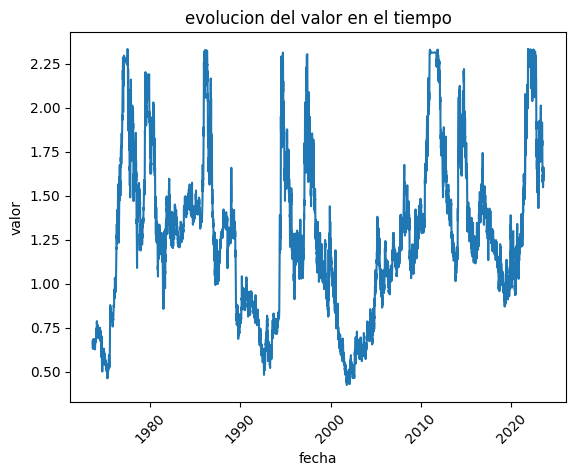

In [ ]:
import seaborn as psn
import matplotlib.pyplot as plt

snb.lineplot(data = datoslimpios , x= "fecha" , y = "valor")
plt.title("evolucion del valor en el tiempo")
plt.xticks(rotation = 45)
plt.tight_layout
plt.show()

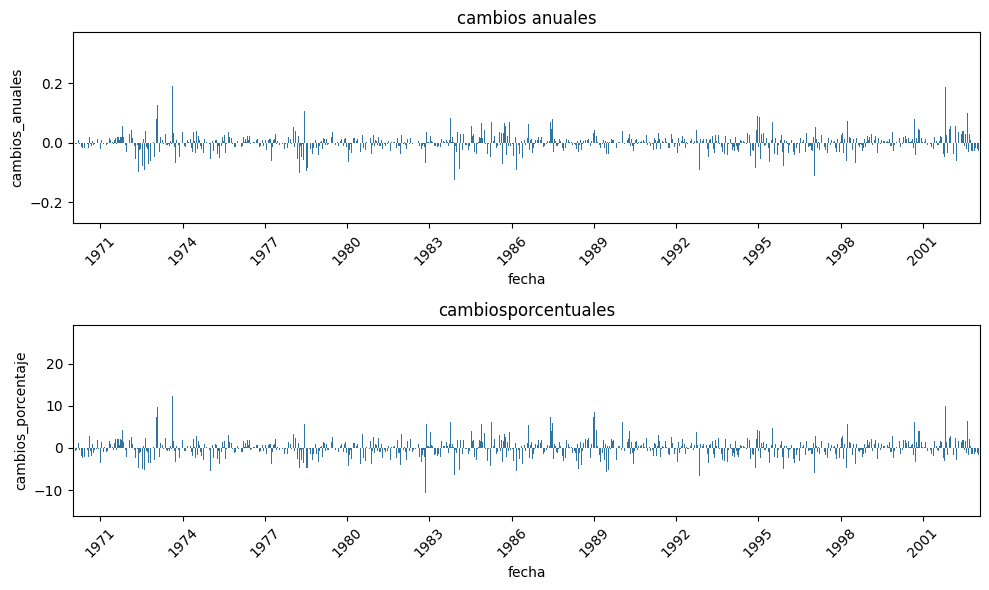

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
fig, ax = plt.subplots(2,1,figsize=(10, 6))

sns.barplot( data = datoslimpios , x = "fecha", y = "cambios_anuales", ax = ax[0])
ax[0].set_title("cambios anuales")

sns.barplot(data= datoslimpios , x = "fecha" , y = "cambios_porcentaje", ax=ax[1])
ax[1].set_title("cambios porcentuales")

for a in ax:
  a.xaxis.set_major_locator(mdates.YearLocator(3))
  a.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
  a.tick_params(axis="x", rotation= 45)


plt.tight_layout()
plt.show()

<ipython-input-33-93d303d1d5a0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoslimpios["fecha"] = pd.to_datetime(datoslimpios["fecha"])


UFuncTypeError: ufunc 'multiply' cannot use operands with types dtype('O') and dtype('<m8[ns]')

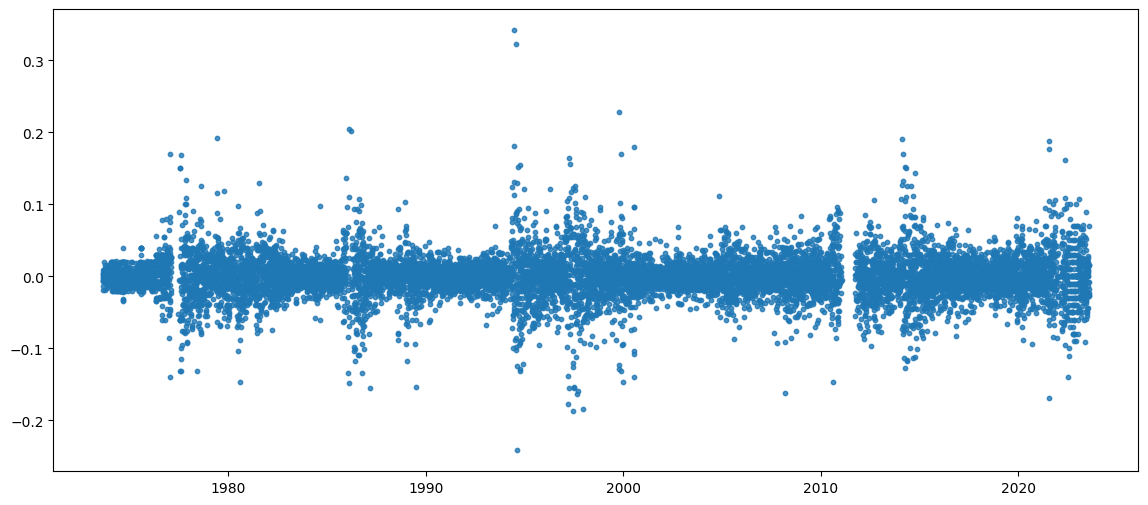

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

datoslimpios["fecha"] = pd.to_datetime(datoslimpios["fecha"])

plt.figure(figsize=(14 , 6))


sns.regplot(
    x = "fecha",
    y = "cambios_anuales",
    data = datoslimpios,
    scatter_kws= {"s": 10},
    line_kws= {"color":"red"},
    ci = None

)

plt.xticks(
    ticks=datoslimpios["fecha"][::int(len(datoslimpios)/10)],
    labels=datoslimpios['fecha'].dt.year[::int(len(datoslimpios)/10)],
    rotation=45

)

plt.title("tendencia de cambios anuales")
plt.xlabel("fecha")
plt.ylabel("cambios anuales")
plt.tight_layout()
plt.show()


<ipython-input-34-f82718ff5e77>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datoslimpios["fecha"] = pd.to_datetime(datoslimpios["fecha"])


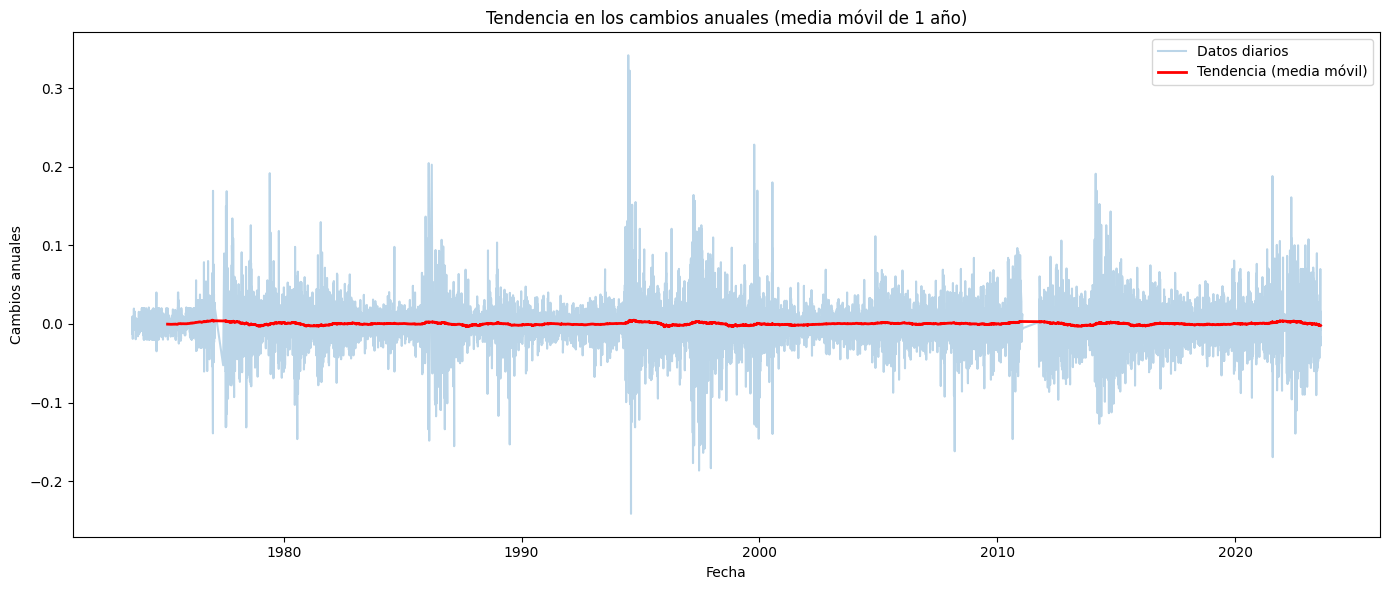

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


datoslimpios["fecha"] = pd.to_datetime(datoslimpios["fecha"])

datoslimpios = datoslimpios.sort_values("fecha")
datoslimpios["media_movil"] = datoslimpios["cambios_anuales"].rolling(window = 365).mean()

# Graficar original vs media móvil
plt.figure(figsize=(14, 6))

# Datos originales (puntos azules)
plt.plot(datoslimpios['fecha'], datoslimpios['cambios_anuales'], alpha=0.3, label='Datos diarios')

# Media móvil (línea roja)
plt.plot(datoslimpios['fecha'], datoslimpios['media_movil'], color='red', linewidth=2, label='Tendencia (media móvil)')

# Títulos y leyenda
plt.title('Tendencia en los cambios anuales (media móvil de 1 año)')
plt.xlabel('Fecha')
plt.ylabel('Cambios anuales')
plt.legend()
plt.tight_layout()
plt.show()


Durante este análisis del comportamiento del precio del café, se realizó un proceso completo que incluyó la limpieza de datos, eliminación de registros atípicos y una visualización profunda para entender la evolución de los precios en el tiempo. Se trabajó con variables como fecha, valor, cambios anuales, cambios porcentuales, mes, climatización y década. A través de gráficas comparativas se observó que las estaciones del año no afectan significativamente los precios, ya que estos se mantuvieron estables a lo largo de los distintos meses y años. Esto sugiere que la variación estacional no es un factor determinante en el comportamiento del precio del café.

No obstante, al segmentar por décadas, se identificaron cambios importantes. En particular, durante la década de los 2000 se registraron precios notablemente bajos, lo cual, según investigaciones complementarias, puede explicarse por un fuerte aumento en la producción de café en países como Brasil y una baja demanda global en ese mismo periodo. Esta sobreoferta en el mercado, combinada con un consumo reducido, parece haber sido el principal factor que afectó el precio, más allá de cualquier patrón estacional. Estas conclusiones se obtuvieron sin aplicar modelos estadísticos avanzados como la prueba ADF, sino a partir del análisis visual e interpretación de los datos representados gráficamente.



